In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\praty\OneDrive\Desktop\Data Anlyst\Latest Portfolio Projects\Logistic.csv")
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Understanding the data

In [6]:
df.shape

(4238, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [98]:
# Convert BMI, heartRate, and glucose to float safely
df[['BMI', 'heartRate', 'glucose']] = df[['BMI', 'heartRate', 'glucose']].apply(
    pd.to_numeric, errors='coerce'
)

# Check the result
print(df.dtypes)


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [99]:
df.columns.tolist()

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [100]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [143]:
df['education'] = df['education'].fillna(df['education'].mode().iloc[0])

for col in ['cigsPerDay','BPMeds','totChol']:
    df[col] = df[col].fillna(0)

for hrt in ['BMI', 'heartRate', 'glucose']:
    df[hrt] = df[hrt].fillna(df[hrt].mode().iloc(0))

In [144]:
df.isnull().sum()
df.columns = df.columns.str.strip()

In [145]:
df.drop_duplicates()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,39
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,48
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,61
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,50
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,51
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.0,84.0,86.0,0,48
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,<pandas.core.indexing._iLocIndexer object at 0...,0,44


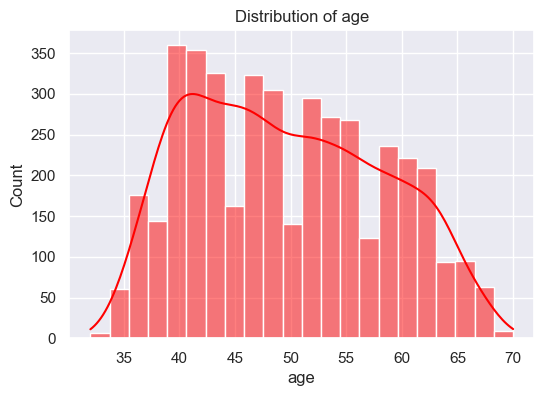

In [161]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (6,4))
sns.histplot(data = df, x = 'age',color= "red",kde = True)
plt.title("Distribution of age")
plt.show()

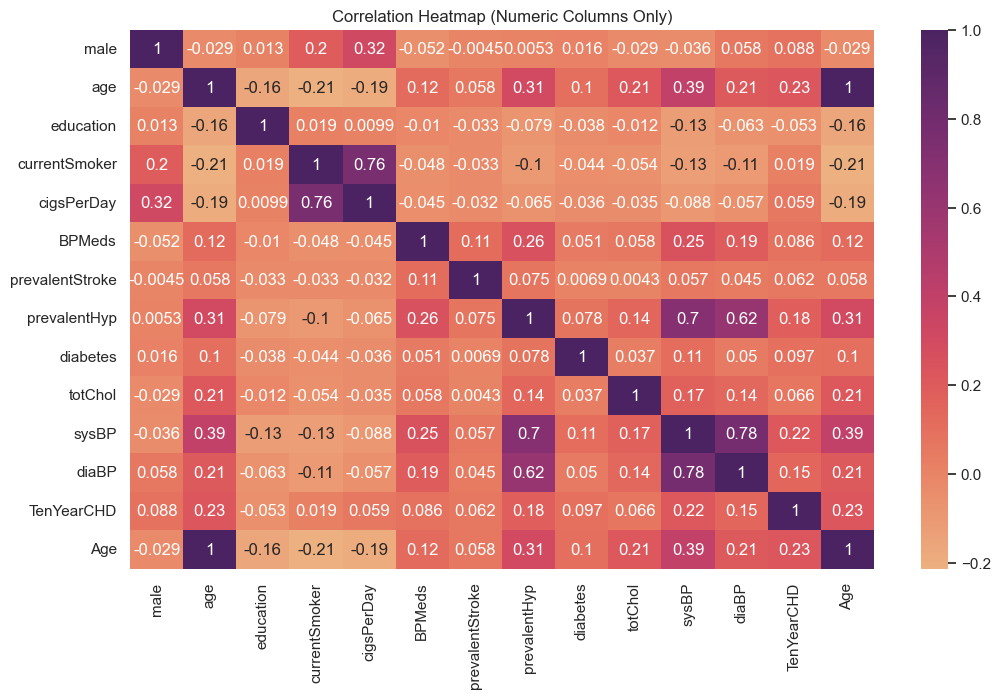

In [150]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='flare')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


<Figure size 1200x600 with 0 Axes>

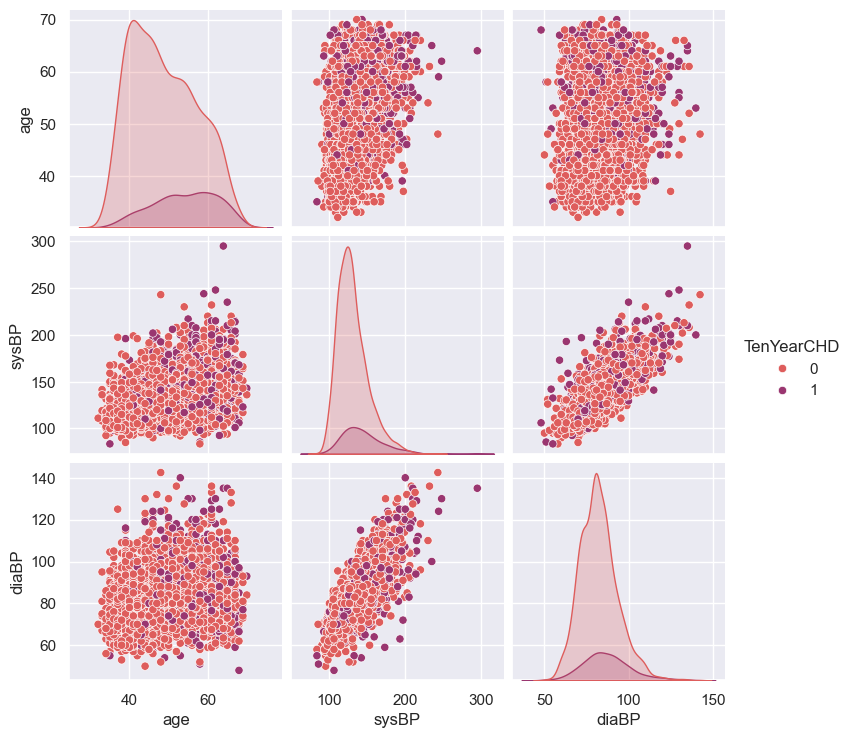

In [151]:
plt.figure(figsize = (12,6))
sns.pairplot(df[['age','BMI','glucose','sysBP','diaBP','TenYearCHD']], hue='TenYearCHD', palette = 'flare')
plt.show()

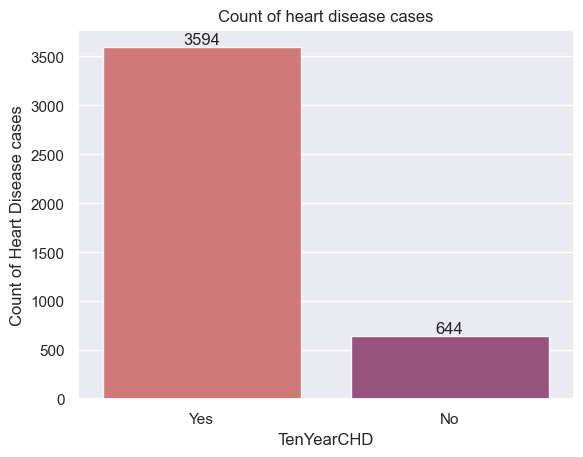

In [152]:
ax = sns.countplot(data  = df, x = 'TenYearCHD', palette = 'flare', alpha = 0.9)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(["Yes", "No"])
plt.xlabel("TenYearCHD")
plt.ylabel("Count of Heart Disease cases")
plt.title("Count of heart disease cases")
plt.show()

In [162]:
# Splitting features & target
X = df.drop("TenYearCHD", axis = 1)
y = df['TenYearCHD']
X = X.select_dtypes(include=['int64', 'float64'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [163]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [165]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy Score:  0.6792452830188679
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.70      0.79       719
           1       0.25      0.57      0.35       129

    accuracy                           0.68       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.80      0.68      0.72       848



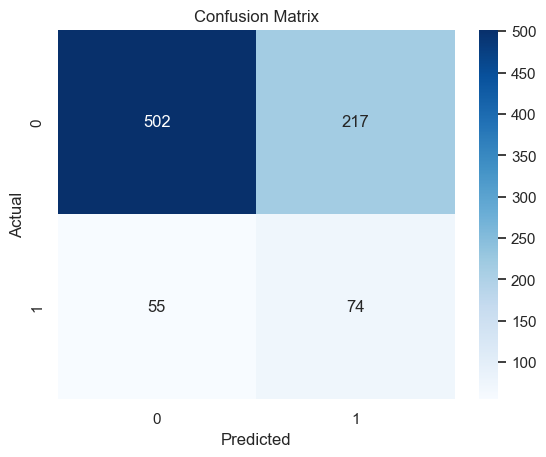

In [166]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

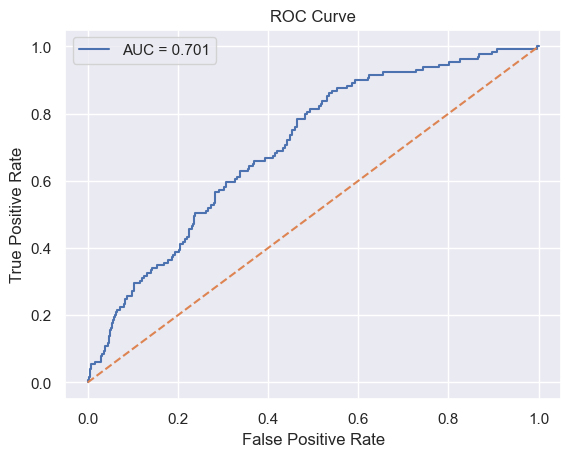

In [167]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
